In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.11


In [19]:
def build(robot):

    start_x=10
    start_y=10
    
    r=2
    Disk(robot,
        x=start_x,
        y=start_x,
        radius=r,
        name='sally')

    r=1
    Disk(robot,
        x=robot['sally'].x+robot['sally'].radius+r,
        y=robot['sally'].y,
        radius=r,
        name='bob')

    
    connect(robot['bob'],robot['sally'],'distance')
    robot.storage=Storage()
    
    robot.a=5
    
    return robot
    
def act(t,robot):
    
    if t<3:
        robot['sally'].τ=0.1
        robot['sally'].F=1
    else:
        robot['sally'].F=0
    
    color=robot['sally'].read_color()
    
    robot.storage += t,robot['sally'].x,robot['sally'].vx
    
    

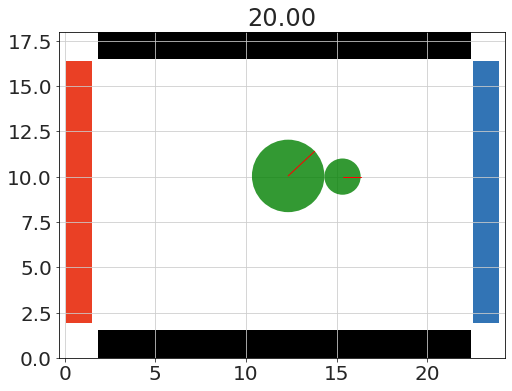

In [20]:
env=Environment(image='images/black red and blue.png') 
robot=Robot(env)

robot=build(robot)

run_sim(env,act,
        total_time=20,  # seconds
        dt=1/60,
        dt_display=0.5,  # make this larger for a faster display
        figure_width=8,
       )

In [28]:
def build(robot):

    start_x=10
    start_y=10
    
    w,h=3,1
    Box(robot,
        x=start_x,
        y=start_x,
        width=w,
        height=h,
        name='sally')

    r=1
    Disk(robot,
        x=robot['sally'].x+robot['sally'].width/2+r,
        y=robot['sally'].y+robot['sally'].height/2+r,
        radius=r,
        name='bob')

    
    connect(robot['sally'],robot['bob'],'revolve')
    robot.storage=Storage()
    
    robot.a=5
    
    return robot
    
def act(t,robot):
    
    if t<3:
        robot['bob'].τ=2
        robot['sally'].F=1
    else:
        robot['sally'].F=0
    
    color=robot['sally'].read_color()
    
    robot.storage += t,robot['sally'].x,robot['sally'].vx
    
    

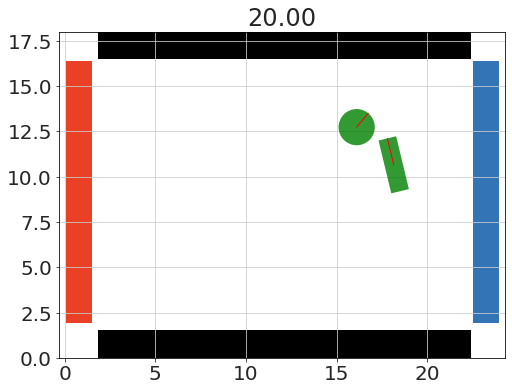

In [29]:
env=Environment(image='images/black red and blue.png') 
robot=Robot(env)

robot=build(robot)

run_sim(env,act,
        total_time=20,  # seconds
        dt=1/60,
        dt_display=0.5,  # make this larger for a faster display
        figure_width=8,
       )

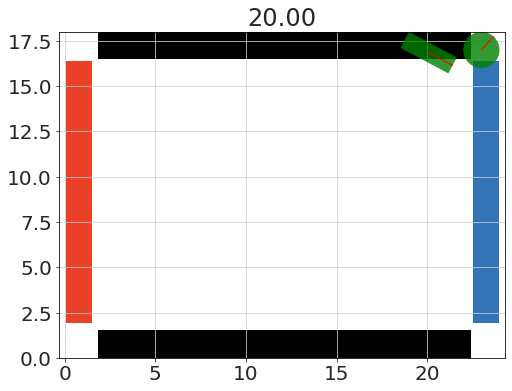

In [31]:
env=Environment(image='images/black red and blue.png',gravity=2) 
robot=Robot(env)

robot=build(robot)

run_sim(env,act,
        total_time=20,  # seconds
        dt=1/60,
        dt_display=0.5,  # make this larger for a faster display
        figure_width=8,
       )

In [49]:
def build(robot):

    start_x=5
    start_y=15
    
    w,h=3,1
    Box(robot,
        x=start_x,
        y=start_y,
        width=w,
        height=h,
        name='sally')

    robot.some_stuff=0
    robot.storage=Storage()
    
    return robot
    
def act(t,robot):
    
    if t<3:
        robot['sally'].F=1
        robot['sally'].F_angle=45
        robot.some_stuff += 1
    else:
        robot['sally'].F=0
    
    robot.storage += t,robot['sally'].x
    robot.message=robot.some_stuff
    

In [50]:
pwd

'/Users/bblais/Documents/Git/AI-and-Robotics-Fall-2020-Class-Notebooks'

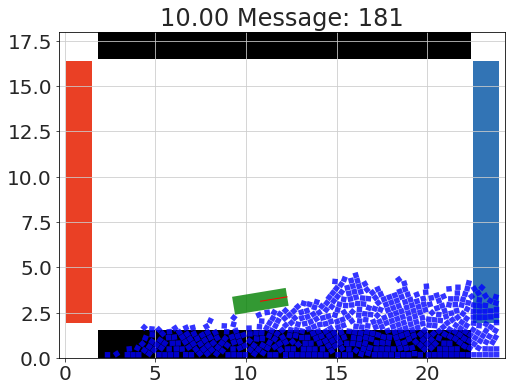

In [64]:
env=Environment(image='images/black red and blue.png',gravity=-1) 
robot=Robot(env)

robot=build(robot)

for x in linspace(10,15,10):
    for y in linspace(2,12,50):
        b=Box(env,x=x,
            y=y,
            width=.3,
            height=.3,
           angle=rand()*5)
        b.F=.01


run_sim(env,act,
        total_time=10,  # seconds
        dt=1/60,
        dt_display=0.5,  # make this larger for a faster display
        figure_width=8,
       )

In [42]:
t,x=robot.storage.arrays()

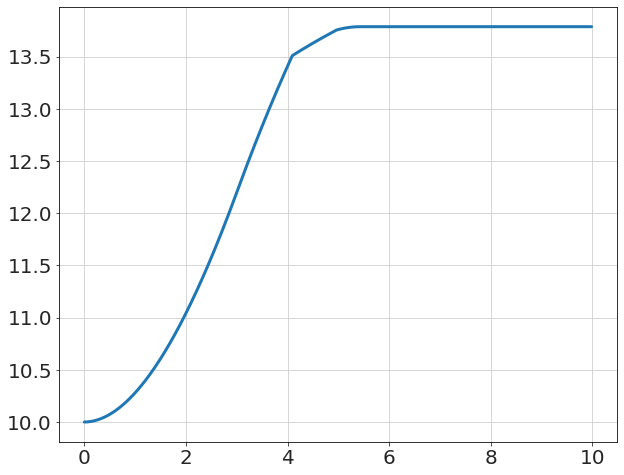

In [43]:
plot(t,x)